In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [ ]:
path="/content/drive/MyDrive/project csv/rainfall in india 1901-2015.csv"

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/project csv/rainfall in india 1901-2015.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
from subprocess import check_output
df = pd.read_csv('/content/drive/MyDrive/project csv/rainfall in india 1901-2015.csv')
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

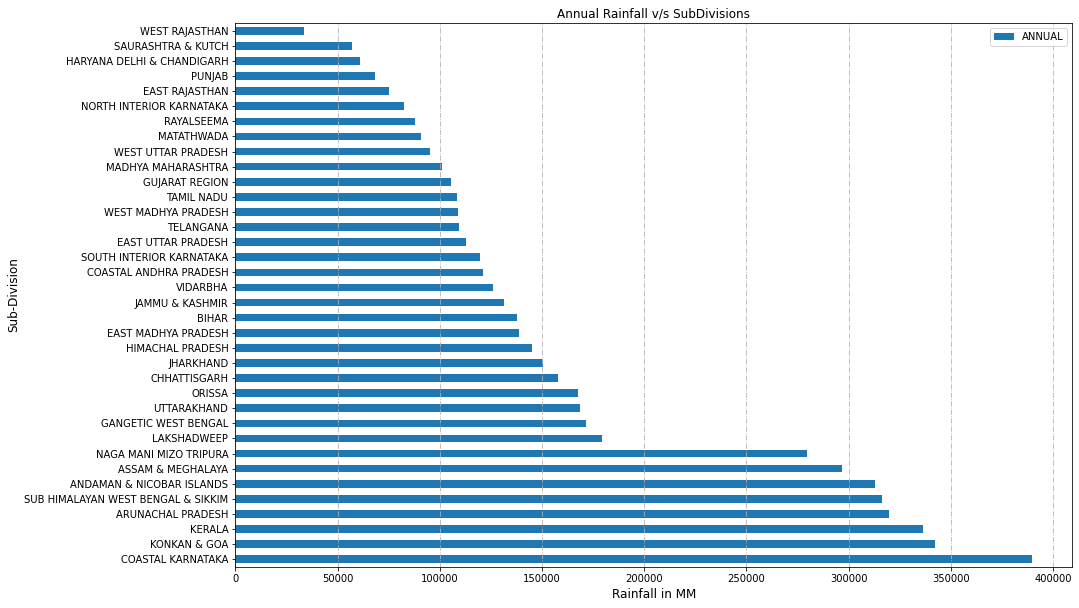

In [ ]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

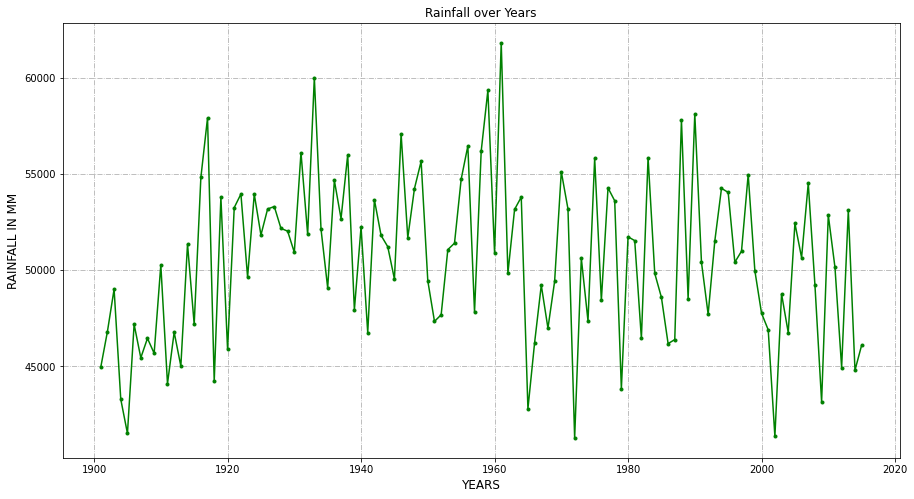

In [ ]:
plt.figure(figsize=(15,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="g",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

Max: 348.5675046813728 ocurred in ['JUL']
Max: 19.111370590830433 ocurred in ['JAN']
Mean: 118.95843815772808


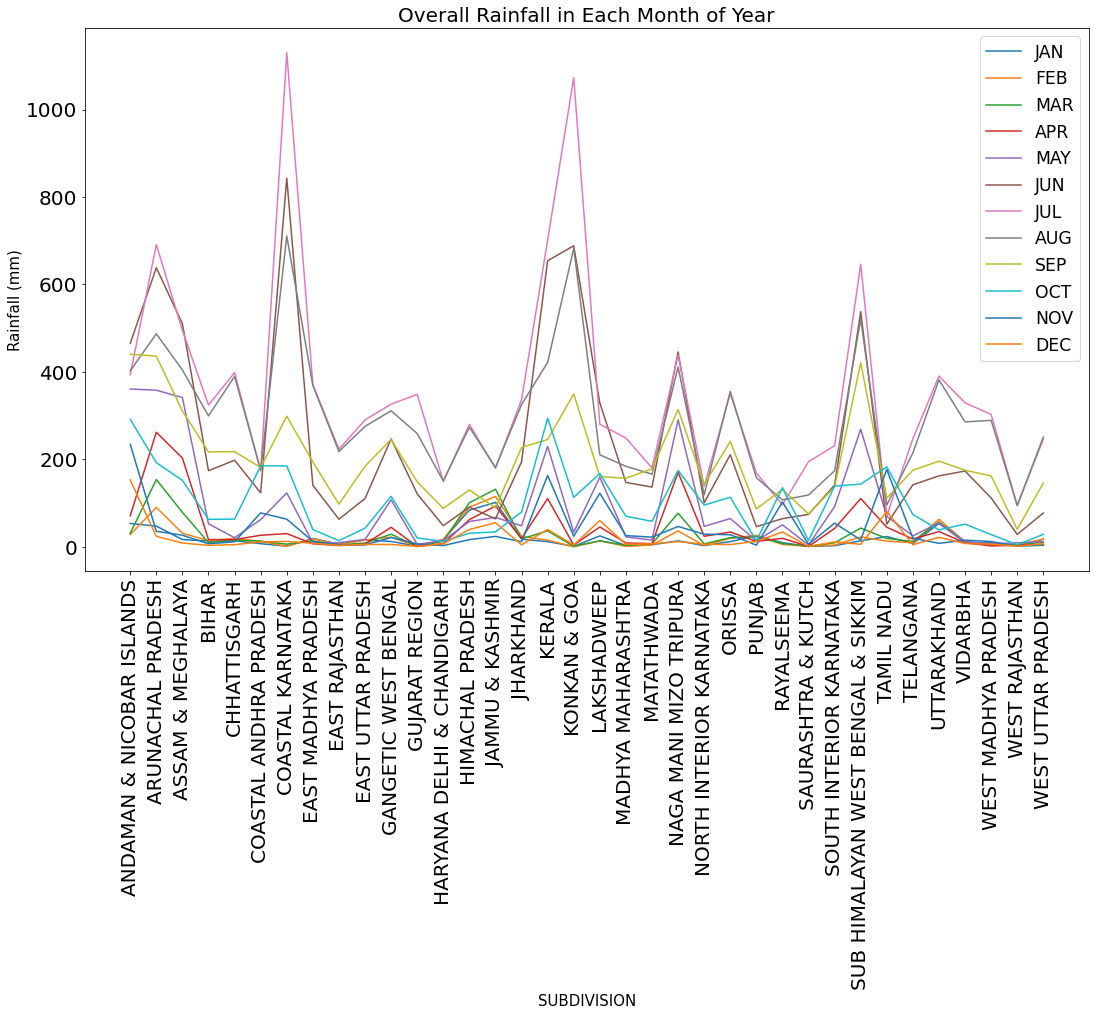

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

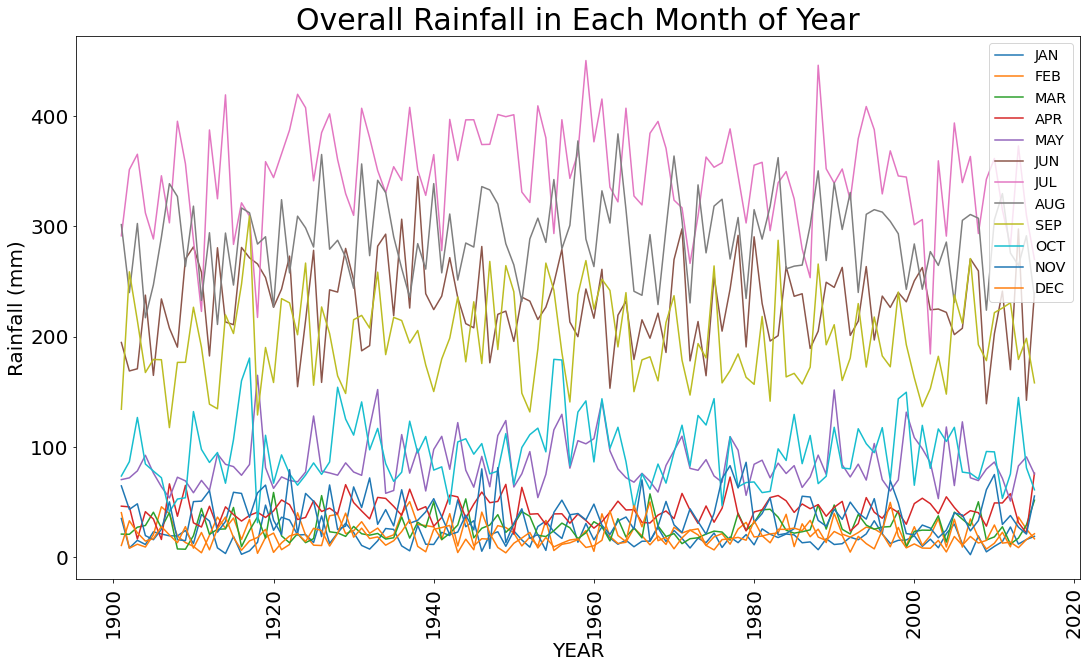

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


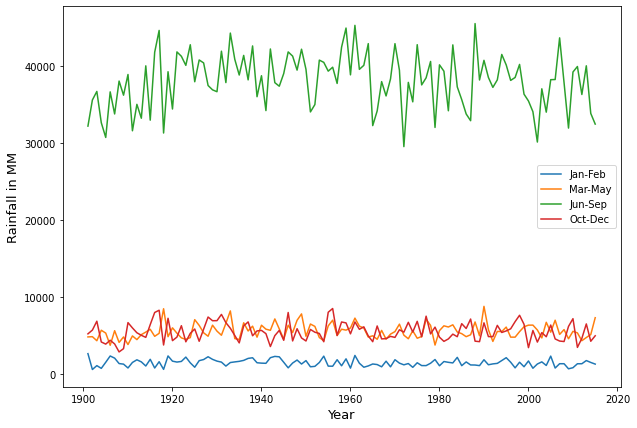

In [ ]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

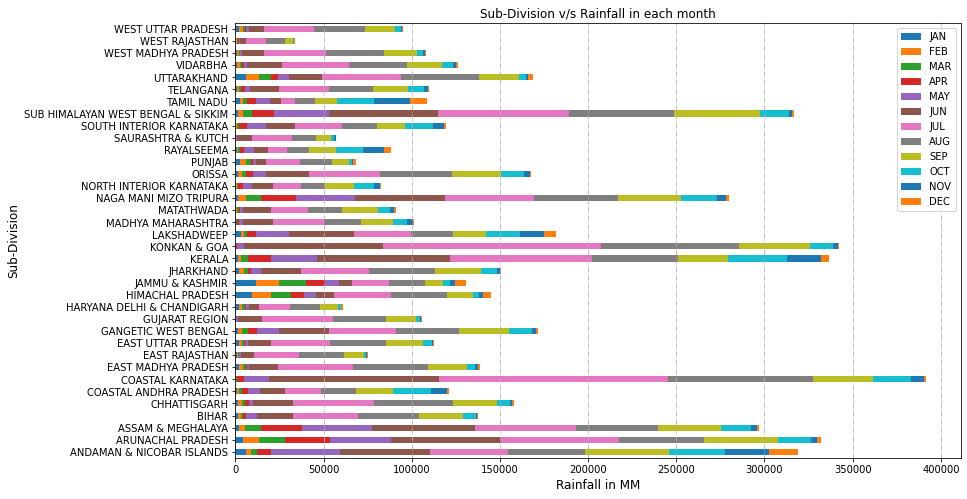

In [ ]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

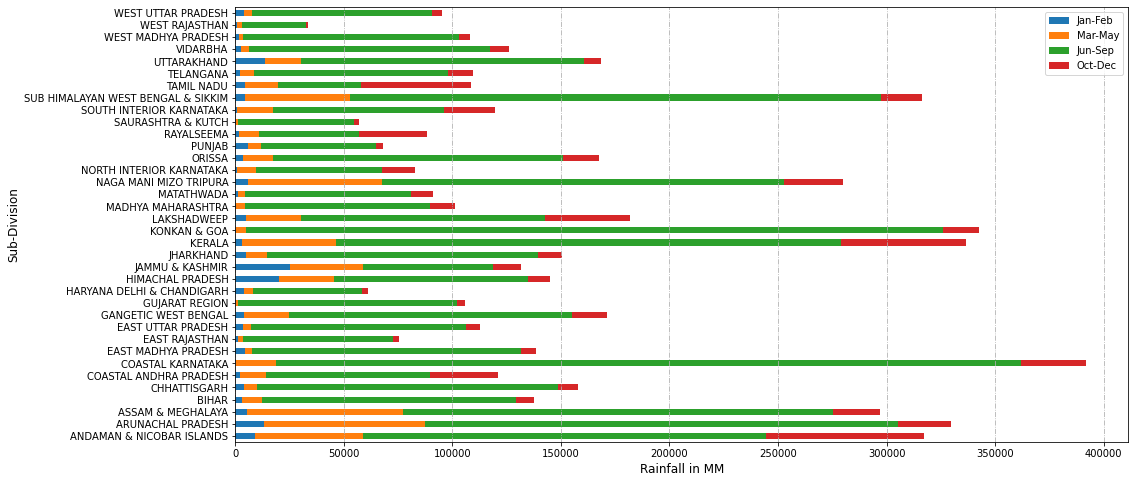

In [ ]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(16,8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

MAD (Training Data): 93.72462230617626
MAD (Test Data): 93.89292486050539


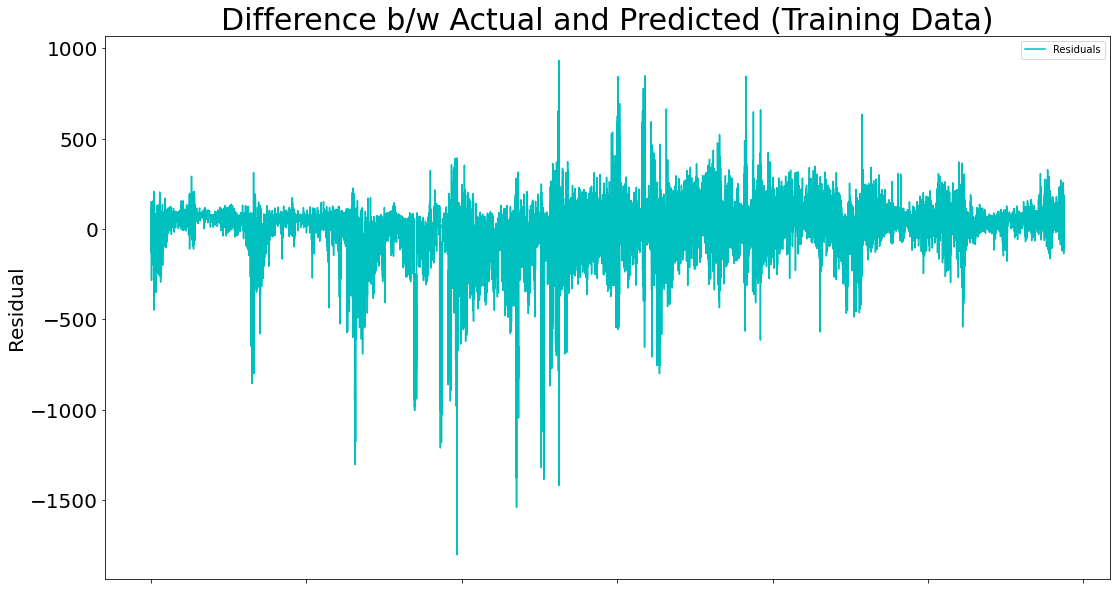

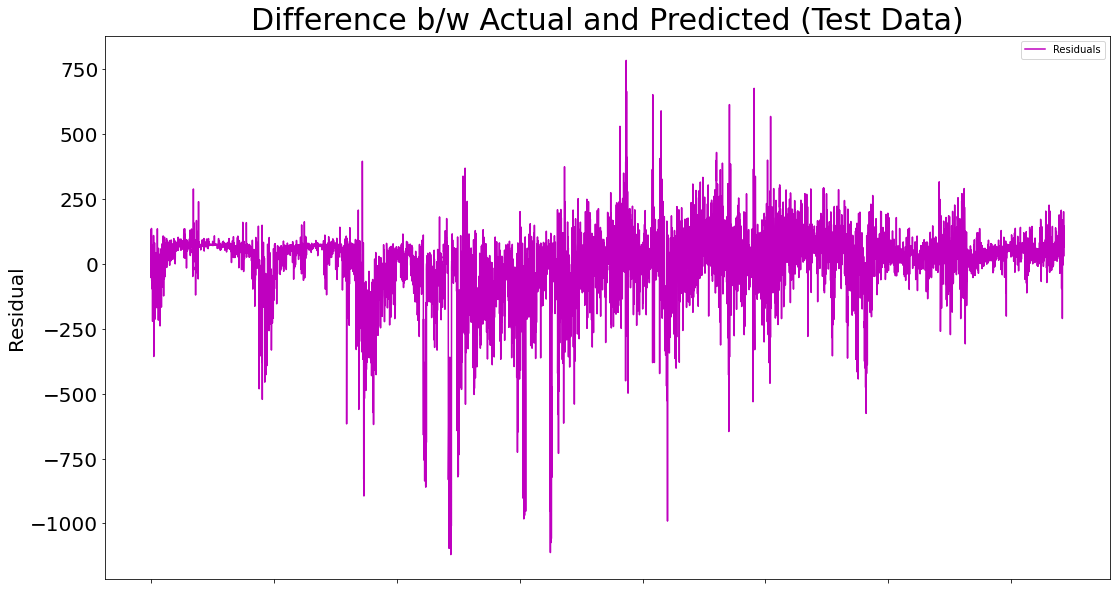

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])
reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
a = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted (Test Data)', color='m', ax=a,fontsize=20)
a.xaxis.set_ticklabels([])
plt.ylabel('Residual')
a.title.set_fontsize(30)
a.xaxis.label.set_fontsize(20)
a.yaxis.label.set_fontsize(20)

MAD (Training Data): 87.81505705952159
MAD (Test Data): 88.90729524755587


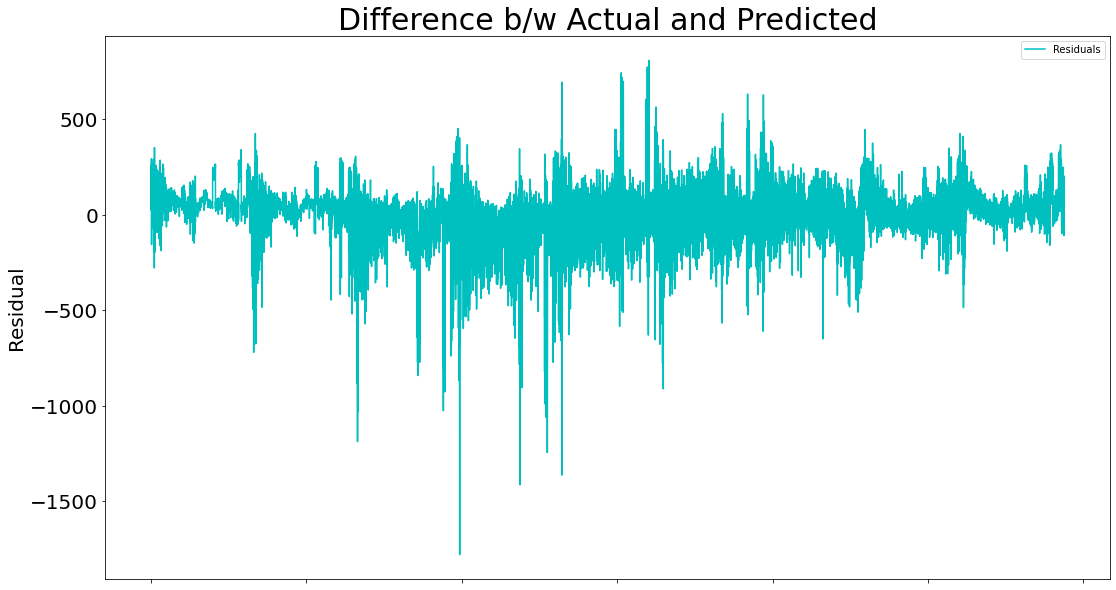

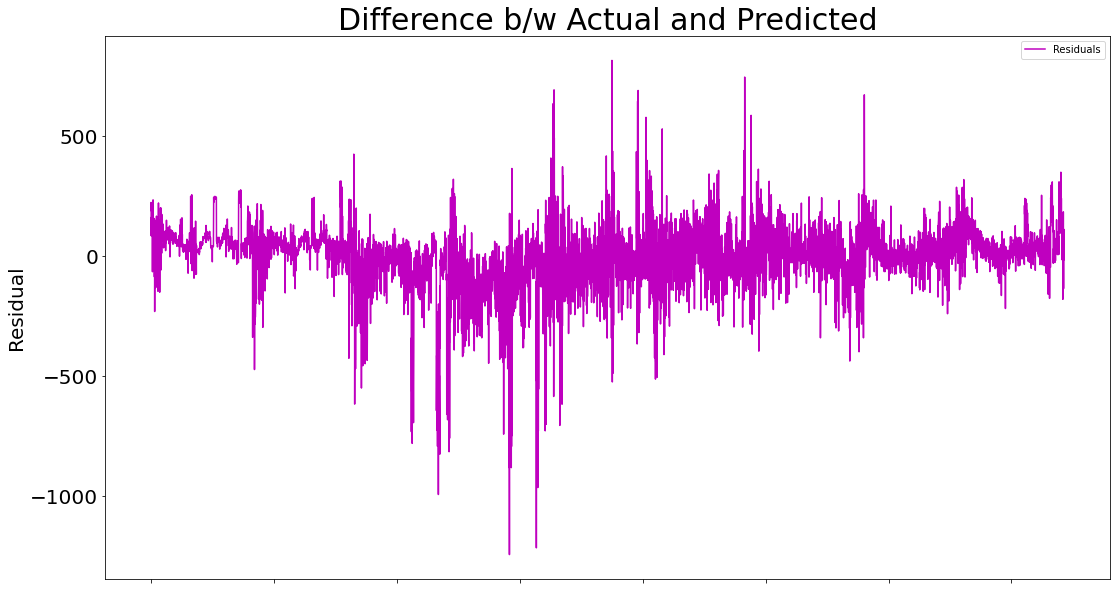

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)


df2.drop('SUBDIVISION', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)



predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Overall MAD (Training): 86.49573524661268
Overall MAD (Testing): 86.60073289899087


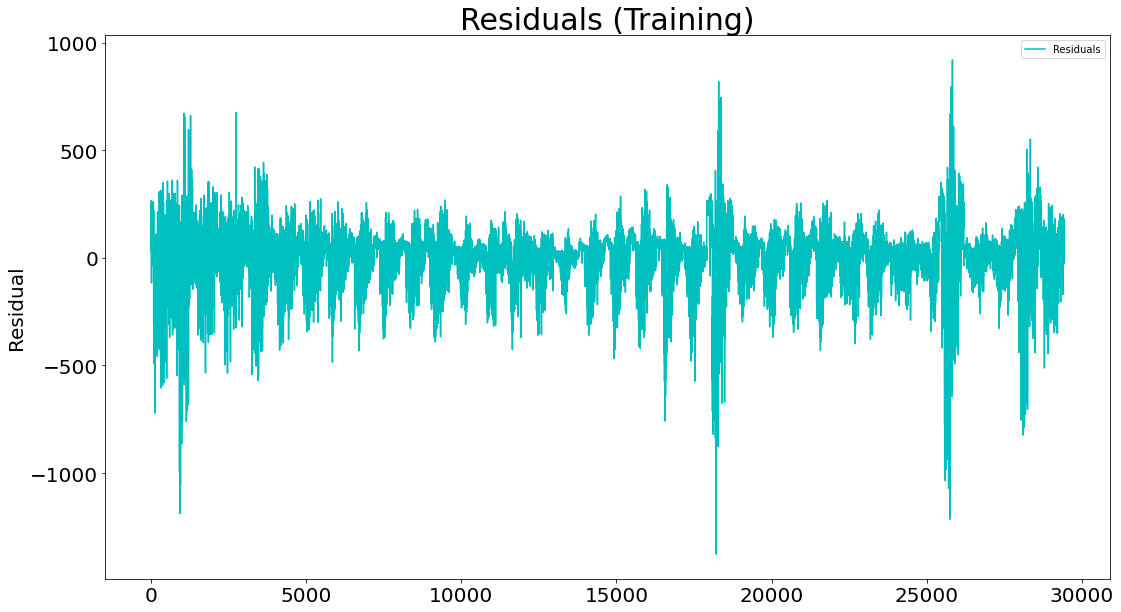

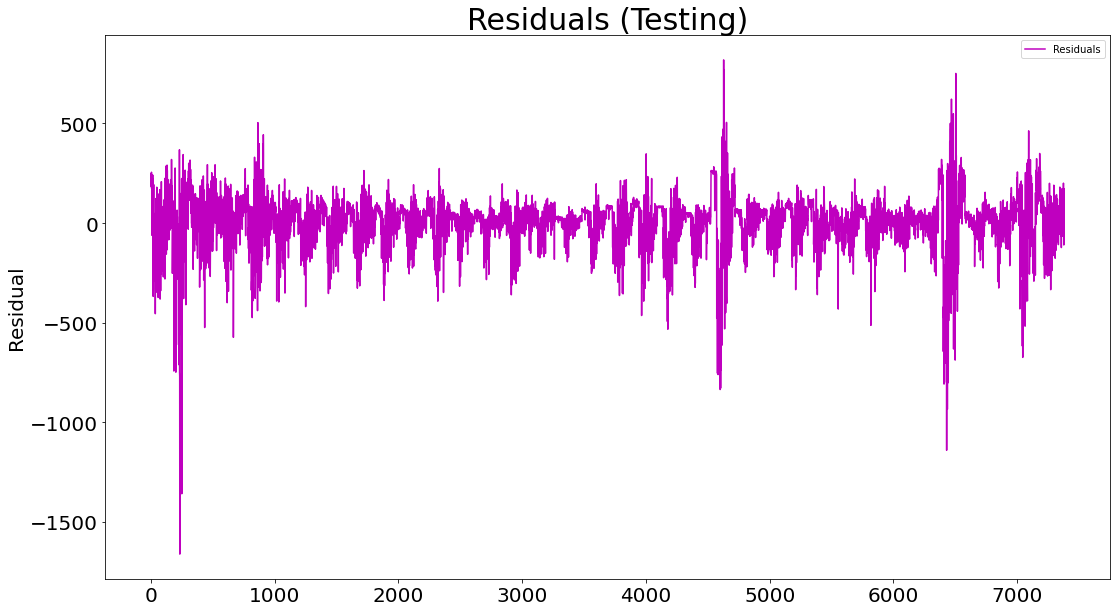

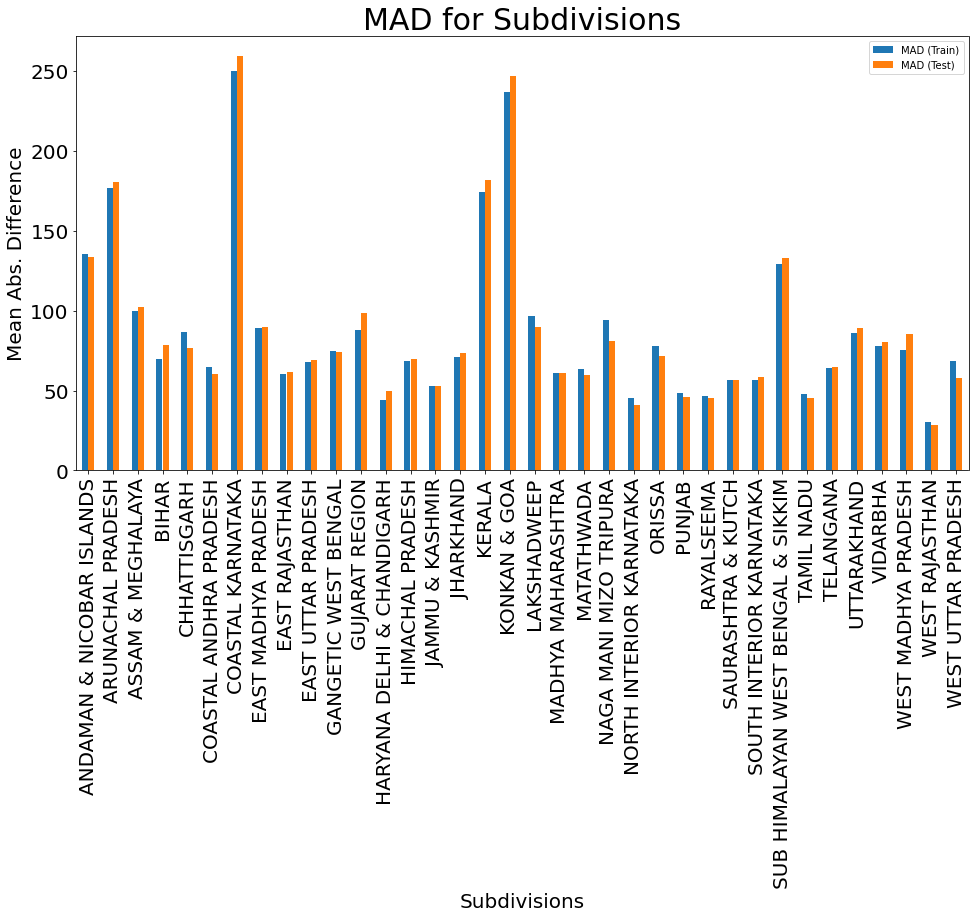

In [ ]:
#subdivs = df['SUBDIVISION'].unique()
#num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1,9):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
    
    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
    
    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='MAD for Subdivisions', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

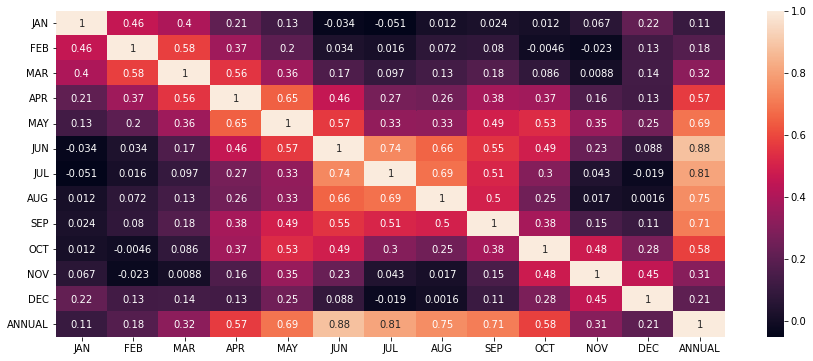

In [ ]:
# correlation b/w each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [ ]:
data["SUBDIVISION"].nunique()

36

In [ ]:
group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
data=group.get_group(('ORISSA'))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
667,1901,39.5,65.1,16.1,51.6,79.0,78.2,288.4,307.7,185.3,76.6,96.7,0.0
668,1902,3.4,0.2,14.2,101.1,56.7,108.3,437.4,349.1,202.7,33.2,13.0,29.6
669,1903,19.7,18.9,10.5,34.6,73.3,154.3,410.4,295.2,265.6,228.5,46.2,11.0
670,1904,0.2,12.2,20.6,10.1,100.2,342.9,336.7,350.4,227.8,111.8,0.0,1.9
671,1905,24.3,17.2,66.3,56.9,107.5,92.0,330.1,281.4,344.1,36.4,0.7,0.4


In [ ]:
df=data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,39.5
1,1,1902,JAN,3.4
2,2,1903,JAN,19.7
3,3,1904,JAN,0.2
4,4,1905,JAN,24.3


In [ ]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,39.5
115,115,1901,FEB,65.1
230,230,1901,MAR,16.1
345,345,1901,APR,51.6
460,460,1901,MAY,79.0


In [ ]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [ ]:
df.columns=['Index','Year','Month','Avg_Rainfall']

In [ ]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,39.5
115,115,1901,FEB,65.1
230,230,1901,MAR,16.1
345,345,1901,APR,51.6
460,460,1901,MAY,79.0


In [ ]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,39.5
115,115,1901,2,65.1
230,230,1901,3,16.1
345,345,1901,4,51.6
460,460,1901,5,79.0
575,575,1901,6,78.2
690,690,1901,7,288.4
805,805,1901,8,307.7
920,920,1901,9,185.3
1035,1035,1901,10,76.6


In [ ]:
df.drop(columns="Index",inplace=True)

In [ ]:
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,39.5
115,1901,2,65.1


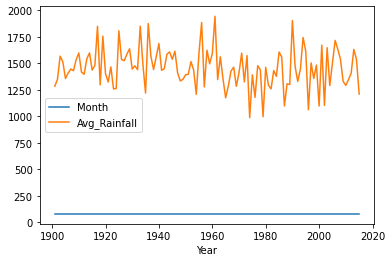

In [ ]:
df.groupby("Year").sum().plot()
plt.show()

In [ ]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [ ]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 41.40407988425524
MSE: 3371.4291877795854
RMSE: 58.06400940151813

-------Train Data--------
MAE: 32.78708840286139
MSE: 2327.649431627886
RMSE: 48.245719308845274


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
87.9
-----------Testing Accuracy------------
82.5


In [ ]:
predicted = random_forest_model.predict([[2022,6]]) #predict the amount of rainfall in june 2022

In [ ]:
predicted

array([221.11351926])